In [9]:
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("glmnet"):
“installation of package ‘glmnet’ had non-zero exit status”


In [10]:
#loading library
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-7



In [11]:
#loading data
data = read.csv("winequality-red.csv", sep = ",", header = TRUE)
head(data,n = 10)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7,7.9,0.60,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
8,7.3,0.65,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
9,7.8,0.58,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7


In [12]:
#Cleaning data
sum(is.na(data))


[1] 0

In [13]:
# Generating the x matrix, y vector and relative vectors
x <- model.matrix(quality ~ ., data)[, -1]
y <- data$quality
names(data)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

In [14]:
#ridge regression
#null model containing only the intercept to the least squares fit
grid <- 10^seq(10, -2, length = 100)
ridge.mod <- glmnet(x, y, alpha = 0, lambda = grid)

In [15]:
# Generating a vector associated value of λ of ridge regression coefficients
dim(coef(ridge.mod))

[1]  12 100

In [16]:
## extract the 50th value of the sequence of λ values from the fitted ridge model
# along with their ℓ2norm
ridge.mod$lambda[50]
coef(ridge.mod)[, 50]
sqrt(sum(coef(ridge.mod)[-1, 50]^2))

[1] 11497.57

(Intercept)        fixed.acidity     volatile.acidity 
        5.641056e+00         4.039505e-06        -1.236668e-04 
         citric.acid       residual.sugar            chlorides 
        6.588280e-05         5.522831e-07        -1.552968e-04 
 free.sulfur.dioxide total.sulfur.dioxide              density 
       -2.745357e-07        -3.190335e-07        -5.255017e-03 
                  pH            sulphates              alcohol 
       -2.119850e-05         8.408936e-05         2.533421e-05

[1] 0.005259955

In [17]:
# # extract the 60th value of the sequence of λ values from the fitted ridge model
# along with their ℓ2norm
ridge.mod$lambda[60]
coef(ridge.mod)[, 60]
sqrt(sum(coef(ridge.mod)[-1, 60]^2))

[1] 705.4802

(Intercept)        fixed.acidity     volatile.acidity 
        5.717968e+00         6.567322e-05        -2.011760e-03 
         citric.acid       residual.sugar            chlorides 
        1.070783e-03         9.006755e-06        -2.528310e-03 
 free.sulfur.dioxide total.sulfur.dioxide              density 
       -4.456604e-06        -5.189499e-06        -8.554549e-02 
                  pH            sulphates              alcohol 
       -3.440822e-04         1.368066e-03         4.121950e-04

[1] 0.08562582

In [18]:
# obtaining upto the 50th, the ridge regression coefficients for a new value of λ,  
predict(ridge.mod, s = 50, type = "coefficients")[1:12, ]

(Intercept)        fixed.acidity     volatile.acidity 
        6.790206e+00         9.065745e-04        -2.809648e-02 
         citric.acid       residual.sugar            chlorides 
        1.479373e-02         1.341048e-04        -3.577633e-02 
 free.sulfur.dioxide total.sulfur.dioxide              density 
       -5.986450e-05        -7.248966e-05        -1.205157e+00 
                  pH            sulphates              alcohol 
       -4.689705e-03         1.918525e-02         5.789197e-03

In [19]:
# Creating training and test data set
set.seed(1)
train <- sample(1:nrow(x), nrow(x) / 2)
test <- (-train)
y.test <- y[test]

In [20]:
# fitting a ridge regression model on the training set, 
# evaluating its MSE on the test set, using λ = 4.
ridge.mod <- glmnet(x[train, ], y[train], alpha = 0,
                    lambda = grid, thresh = 1e-12)
ridge.pred <- predict(ridge.mod, s = 4, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 0.5470549

In [21]:
# the MSE on the intercept
mean((mean(y[train]) - y.test)^2)


[1] 0.6479634

In [22]:
# fitting the ridge model on a large value,i.e, 1e10
ridge.pred <- predict(ridge.mod, s = 1e10, newx = x[test, ])
mean((ridge.pred - y.test)^2)

[1] 0.6479634

In [23]:
#linear model using least squares on the training set
#least squares is simply ridge regression with λ = 0^8.
ridge.pred <- predict(ridge.mod, s = 0, newx = x[test, ],
                      exact = T, x = x[train, ], y = y[train])
MSE.lm = mean((ridge.pred - y.test)^2)
MSE.lm
lm(y ~ x, subset = train)
predict(ridge.mod, s = 0, exact = T, type = "coefficients",
        x = x[train, ], y = y[train])[1:12, ]

[1] 0.4172202


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
          (Intercept)         xfixed.acidity      xvolatile.acidity  
            38.223749               0.038090              -1.156466  
         xcitric.acid        xresidual.sugar             xchlorides  
            -0.186289               0.026133              -0.619347  
 xfree.sulfur.dioxide  xtotal.sulfur.dioxide               xdensity  
             0.004900              -0.003773             -34.706478  
                  xpH             xsulphates               xalcohol  
            -0.264661               0.860893               0.260805  


(Intercept)        fixed.acidity     volatile.acidity 
        38.225813914          0.038092614         -1.156465351 
         citric.acid       residual.sugar            chlorides 
        -0.186288037          0.026133704         -0.619334716 
 free.sulfur.dioxide total.sulfur.dioxide              density 
         0.004899898         -0.003772896        -34.708618626 
                  pH            sulphates              alcohol 
        -0.264642773          0.860895036          0.260802653

[1] 0.05473216

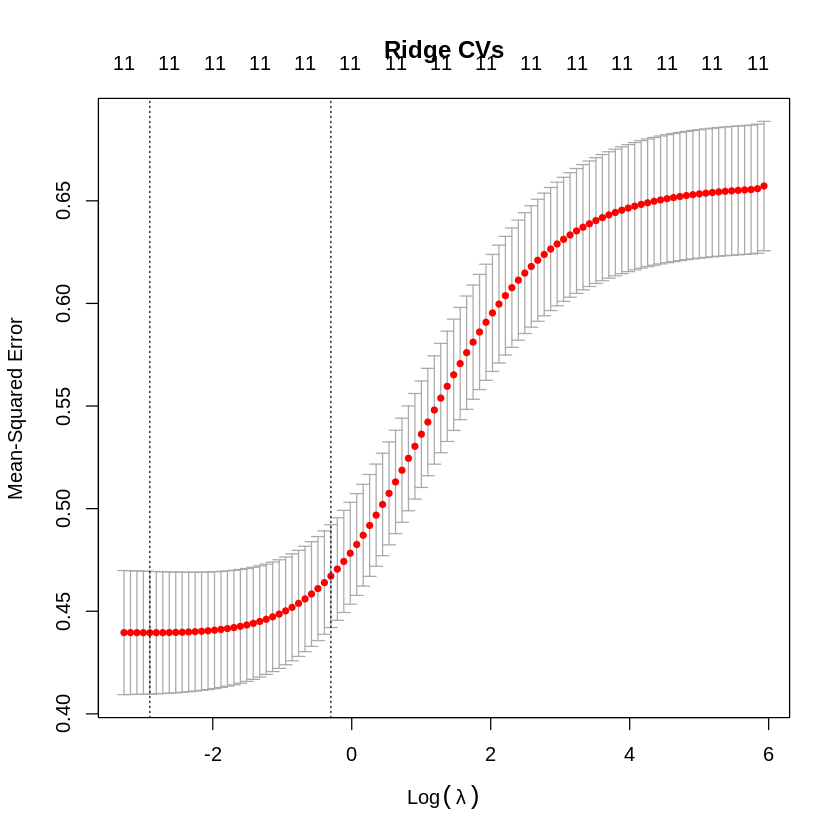

In [24]:
#using the ten-fold cross-validation
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 0)
plot(cv.out)
title("Ridge CVs")
bestlam <- cv.out$lambda.min
bestlam #the value of λ that results in the smallest cross-validation error


In [25]:
ridge.pred <- predict(ridge.mod, s = bestlam,
                      newx = x[test, ])
MSE.ridge=mean((ridge.pred - y.test)^2)
MSE.ridge

[1] 0.4173916

In [26]:
# ridge regression model on the full data set with  λ chosen by cross-validation
out <- glmnet(x, y, alpha = 0)
predict(out, type = "coefficients", s = bestlam)[1:12, ]


(Intercept)        fixed.acidity     volatile.acidity 
        33.548548106          0.030896360         -0.997672990 
         citric.acid       residual.sugar            chlorides 
        -0.058295421          0.019342953         -1.789854477 
 free.sulfur.dioxide total.sulfur.dioxide              density 
         0.003515202         -0.003026691        -29.739079496 
                  pH            sulphates              alcohol 
        -0.289369193          0.875042469          0.248456315

In [27]:
#lasso regression
# fitting the lasso model on train data
lasso.mod <- glmnet(x[train, ], y[train], alpha = 1,
                    lambda = grid)
# plotting out the model
#plot(lasso.mod)

[1] 0.01921751

[1] 0.4234683

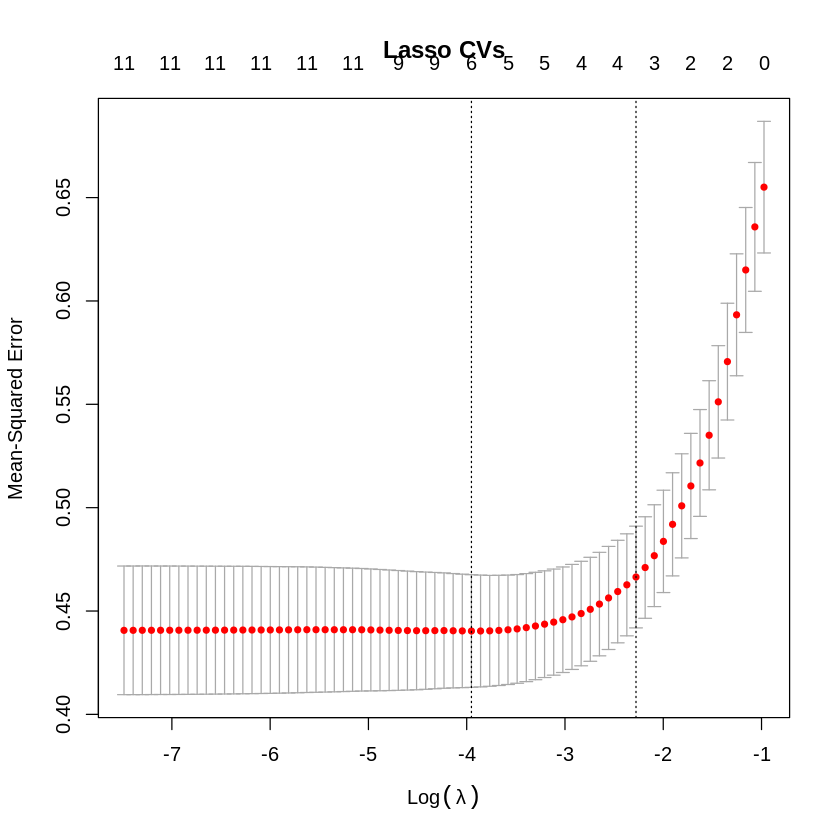

In [28]:
# Performing cross-validation and compute the associated test error
set.seed(1)
cv.out <- cv.glmnet(x[train, ], y[train], alpha = 1)
plot(cv.out)
title("Lasso CVs")
bestlam <- cv.out$lambda.min
bestlam
lasso.pred <- predict(lasso.mod, s = bestlam,
                      newx = x[test, ])
MSE.lasso = mean((lasso.pred - y.test)^2)
MSE.lasso

In [29]:
# lasso regression model on the full data set with  λ chosen by cross-validation
out <- glmnet(x, y, alpha = 1, lambda = grid)
lasso.coef <- predict(out, type = "coefficients",
                      s = bestlam)[1:12, ]
lasso.coef
lasso.coef[lasso.coef != 0] # without zero's

(Intercept)        fixed.acidity     volatile.acidity 
        3.8518863485         0.0001654171        -1.0338390358 
         citric.acid       residual.sugar            chlorides 
        0.0000000000         0.0000000000        -1.3150092211 
 free.sulfur.dioxide total.sulfur.dioxide              density 
        0.0000000000        -0.0018178704         0.0000000000 
                  pH            sulphates              alcohol 
       -0.2651747454         0.7372736390         0.2802192916

(Intercept)        fixed.acidity     volatile.acidity 
        3.8518863485         0.0001654171        -1.0338390358 
           chlorides total.sulfur.dioxide                   pH 
       -1.3150092211        -0.0018178704        -0.2651747454 
           sulphates              alcohol 
        0.7372736390         0.2802192916

In [30]:
### Saving all results in a data frame
MSE.all = data.frame(cbind(MSE.lm, MSE.ridge, MSE.lasso), row.names = "MSE")
colnames(MSE.all) = c("lm", "ridge", "lasso")
MSE.all

,lm,ridge,lasso
,<dbl>,<dbl>,<dbl>
MSE,0.4172202,0.4173916,0.4234683
